In [1]:
import pandas as pd
import geopandas as gpd
import geopy
import fiona

In [2]:
facilities = pd.read_csv("HealthCareFacilitiesCU.csv")
facilities.head()

,Facility Name,Facility Type,Lat,Lon,Address,Walkin Hours,Walkin Days
0,Campustown Urgent Care,Urgent Care,NaN,NaN,"631 E Green St, Champaign, IL 61820",09:00-18:00,All
1,OSF OnCall,Urgent Care,NaN,NaN,"2043 S Neil St, Champaign, IL 61820",08:00-20:00,All
2,217 Immediate Care,Urgent Care,NaN,NaN,"1806 N Market St, Champaign, IL 61822",07:00-16:30,M-F
3,OSF OnCall,Urgent Care,NaN,NaN,"2718 N Prospect Ave, Champaign, IL 61822",08:00-20:00,All
4,Christie Clinic Convenient Care,Urgent Care,NaN,NaN,"1710 E Windsor Rd, Urbana, IL 61802",08:00-20:00,All


In [3]:
for idx, row in facilities.iterrows():
    address = row['Address']
    coords = gpd.tools.geocode(address)
    facilities.at[idx, 'Lon'] = coords['geometry'][0].x
    facilities.at[idx, 'Lat'] = coords['geometry'][0].y

In [4]:
facilities.to_csv('Geocoded.csv')

In [5]:
facilities_gdf = gpd.GeoDataFrame(facilities, geometry=gpd.points_from_xy(facilities.Lon, facilities.Lat))
facilities_gdf = facilities_gdf.set_crs("EPSG:4326")

In [6]:
facilities_gdf.to_file('facilities/CUHealthcare.shp')

/tmp/ipykernel_228/2532086965.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  facilities_gdf.to_file('facilities/CUHealthcare.shp')


In [7]:
print(facilities_gdf.crs)

EPSG:4326


<AxesSubplot:>

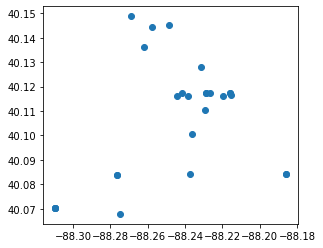

In [8]:
facilities_gdf.plot()